<a href="https://colab.research.google.com/github/Jushef/Proyectos-ML-DL/blob/main/Unsupervised%20Learning/Dimensionality%20reduction/YieldCurveConstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Construcción de la curva de rendimiento

En este proyecto utilizamos el análisis de componentes principales (PCA) para generar los movimientos típicos de una curva de rendimiento. 

## Contenido

* [1. Definición del problema](#0)
* [2. Inicio - Cargar bibliotecas y conjunto de datos](#1)
    * [2.1. Cargar Bibliotecas](#1.1)    
    * [2.2. Cargar el conjunto de datos](#1.2)
* [3. Análisis exploratorio de datos](#2)
    * [3.1. Estadísticas descriptivas](#2.1)    
    * [3.2. Visualización de datos](#2.2)
* [4. Preparación de los datos](#3)
    * [4.1. Limpieza de datos](#3.1)
    * [4.3.Transformación de datos](#3.2)  
* [5.Evaluar algoritmos y modelos](#4)        
    * [5.1. Entrenamiento de la prueba dividida](#4.1)
    * [5.2. Evaluación de modelos - Aplicación del análisis de componentes principales](#4.2)
        * [5.2.1. Varianza explicada mediante PCA](#4.2.1)
        * [5.2.2. Encontrar la mejor cartera Eigen](#4.2.2)
        * [5.2.3. Backtesting Eigenportfolio](#4.2.3)

<a id='0'></a>
# 1. Definición del problema

Nuestro objetivo en este proyecto es utilizar técnicas de reducción de la dimensionalidad para generar
los movimientos "típicos" de una curva de rendimiento.
Los datos utilizados para este estudio de caso se obtienen de Quandl. 

Quandl es una fuente
fuente de datos financieros, económicos y alternativos. Utilizamos los datos de 11 tenores (de 1 mes a 30 años) de las curvas del tesoro. La frecuencia de los datos es diaria y los datos están disponibles a partir de 1960.



<a id='1'></a>
# 2. Empezando - Cargando los datos y los paquetes de python

<a id='1.1'></a>
## 2.1. Carga de los paquetes python

In [5]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 15.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [6]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import yfinance as yf
from pandas_datareader import data as pdr
import datetime

#Import Model Packages 
from sklearn.decomposition import PCA

<a id='1.2'></a>
## 2.2. Loading the Data

In [16]:
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2022, 3, 1)

In [17]:
treasury = ['DGS1MO',
           'DGS3MO',
           'DGS6MO',
           'DGS1',
           'DGS2',
           'DGS3',
           'DGS5',
           'DGS7',
           'DGS10',
           'DGS20',
           'DGS30']

yf.pdr_override()
treasury_df = pdr.get_data_fred(treasury, start= start, end= end)

treasury_df.columns = ['TRESY1mo',
                    'TRESY3mo', 
                    'TRESY6mo',
                    'TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y',
                    'TRESY20y',
                    'TRESY30y']

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
dataset = treasury_df
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Análisis exploratorio de datos

<a id='2.1'></a>
## 3.1. Estadísticas descriptivas

In [20]:
# shape
dataset.shape

(15696, 11)

In [21]:
# consultar los datos
set_option('display.width', 100)
dataset.tail()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
DATE,,,,,,,,,,,
2022-02-23,0.02,0.34,0.74,1.16,1.58,1.78,1.89,1.98,1.99,2.36,2.29
2022-02-24,0.05,0.32,0.65,1.08,1.54,1.73,1.84,1.94,1.96,2.36,2.28
2022-02-25,0.03,0.33,0.71,1.13,1.55,1.76,1.86,1.96,1.97,2.37,2.29
2022-02-28,0.06,0.35,0.69,1.01,1.44,1.62,1.71,1.81,1.83,2.25,2.17
2022-03-01,0.11,0.32,0.60,0.91,1.31,1.47,1.56,1.67,1.72,2.19,2.11


In [22]:
# tipos
set_option('display.max_rows', 500)
dataset.dtypes

TRESY1mo    float64
TRESY3mo    float64
TRESY6mo    float64
TRESY1y     float64
TRESY2y     float64
TRESY3y     float64
TRESY5y     float64
TRESY7y     float64
TRESY10y    float64
TRESY20y    float64
TRESY30y    float64
dtype: object

In [23]:
# describir los datos
set_option('precision', 3)
dataset.describe()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
count,5148.000,10124.000,10124.000,15026.000,11434.000,15026.000,15026.000,13156.000,15026.00,15029.000,11256.000
mean,1.180,3.779,3.959,4.924,5.044,5.335,5.600,5.959,5.94,6.208,6.342
std,1.452,3.250,3.365,3.456,3.812,3.338,3.202,3.265,2.99,2.834,3.049
min,0.000,0.000,0.020,0.040,0.090,0.100,0.190,0.360,0.52,0.870,0.990
25%,0.060,0.500,0.640,2.150,1.530,2.640,3.150,3.120,3.92,4.200,3.960
50%,0.480,3.570,3.760,5.000,4.895,5.390,5.550,6.100,5.74,5.970,5.830
75%,1.790,5.780,6.030,6.890,7.527,7.328,7.550,7.900,7.69,7.890,8.290
max,5.270,17.010,17.430,17.310,16.950,16.590,16.270,16.050,15.84,15.780,15.210


<a id='2.2'></a>
## 3.2. Visualización de datos

Observemos el movimiento de la curva de rendimiento. 

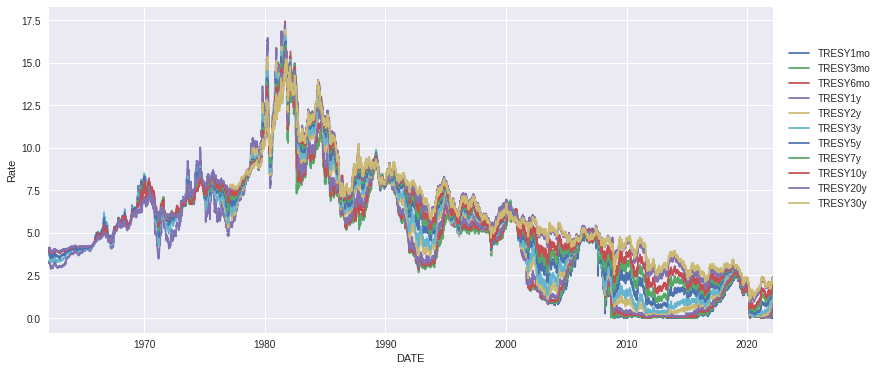

In [24]:
plt.style.use('seaborn')

dataset.plot(figsize=(13,6))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

En el siguiente paso, examinamos la correlación.

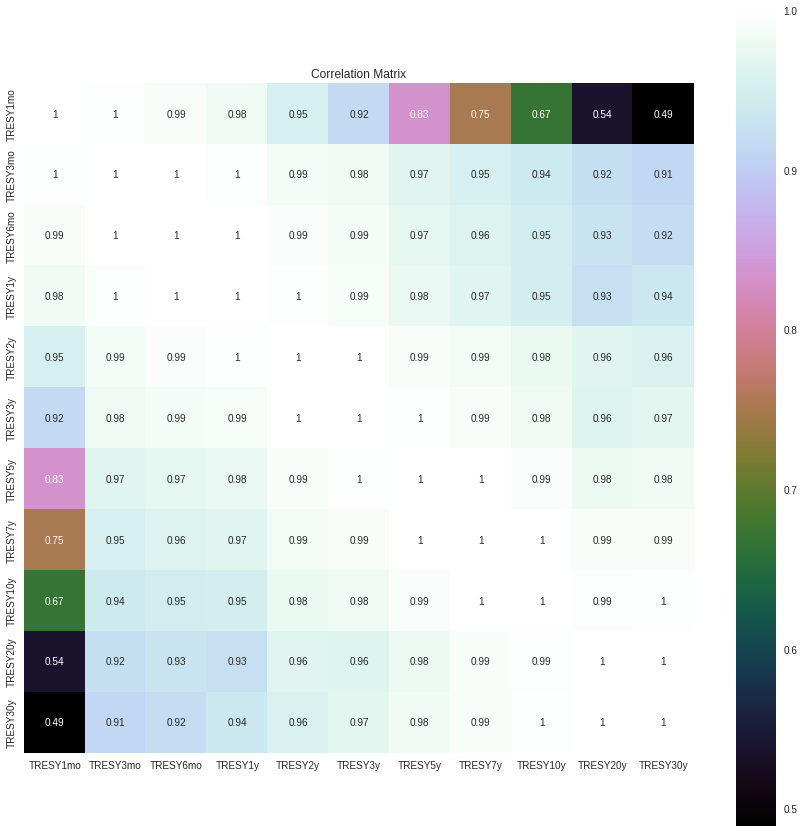

In [25]:
# correlación
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

* Como puede verse en la imagen anterior, existe una correlación positiva significativa entre los valores. 

<a id='3'></a>
## 4. Preparación de los datos

<a id='3.1'></a>
## 4.1. Limpieza de datos
Se comprueba la presencia de los NA en los datos, se eliminan o se rellenan con la media de la columna.
los rellenamos con la media de la columna.

In [26]:
# Comprobación de los valores nulos y eliminación de los mismos
print('Null Values =',dataset.isnull().values.any())

Null Values = True


* Dado que hay valores nulos, se elimina la raíz que contiene los valores nulos.

In [27]:
# Rellenar los valores que faltan con el último valor disponible en el conjunto de datos. 
dataset=dataset.fillna(method='ffill')

# Eliminar las filas que contienen NA
dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

dataset.head()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
DATE,,,,,,,,,,,
2001-07-31,3.67,3.54,3.47,3.53,3.79,4.06,4.57,4.86,5.07,5.61,5.51
2001-08-01,3.65,3.53,3.47,3.56,3.83,4.09,4.62,4.90,5.11,5.63,5.53
2001-08-02,3.65,3.53,3.46,3.57,3.89,4.17,4.69,4.97,5.17,5.68,5.57
2001-08-03,3.63,3.52,3.47,3.57,3.91,4.22,4.72,4.99,5.20,5.70,5.59
2001-08-06,3.62,3.52,3.47,3.56,3.88,4.17,4.71,4.99,5.19,5.70,5.59


<a id='3.2'></a>
## 4.2. Transformación de datos

Todas las variables deben estar en la misma escala antes de aplicar el PCA, de lo contrario una característica con valores grandes dominará el resultado. Utilizamos StandardScaler en sklearn para estandarizar las características del conjunto de datos en la escala de la unidad (media = 0 y varianza = 1).

In [28]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler().fit(dataset)
rescaledDataset = pd.DataFrame(scaler.fit_transform(dataset),columns = dataset.columns, index = dataset.index)

# resumir los datos transformados
dataset.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
DATE,,,,,,,,,,,
2001-07-31,1.717,1.566,1.418,1.415,1.499,1.586,1.727,1.752,1.708,1.631,1.567
2001-08-01,1.703,1.560,1.418,1.435,1.528,1.608,1.766,1.785,1.741,1.647,1.584
2001-08-02,1.703,1.560,1.411,1.442,1.570,1.667,1.821,1.841,1.791,1.687,1.619
2001-08-03,1.689,1.553,1.418,1.442,1.584,1.704,1.844,1.858,1.817,1.703,1.636
2001-08-06,1.682,1.553,1.418,1.435,1.563,1.667,1.836,1.858,1.808,1.703,1.636


__Visualización del conjunto de datos normalizados__

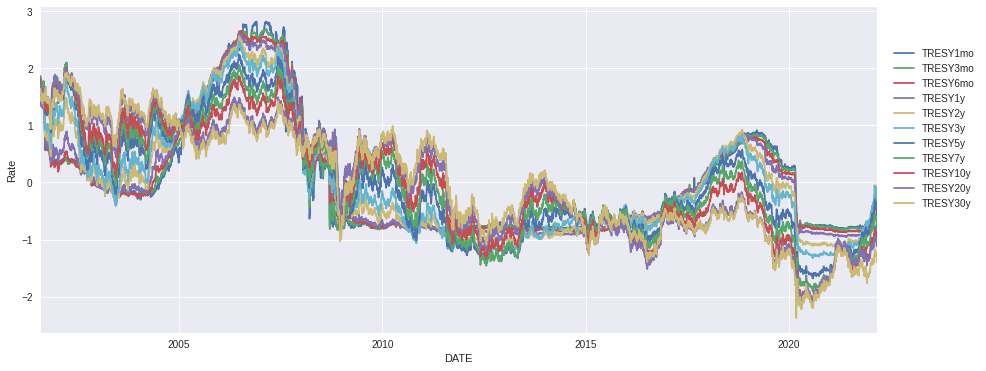

In [29]:
rescaledDataset.plot(figsize=(15,6))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

<a id='4'></a>
# 5. Evaluar algoritmos y modelos

<a id='4.2'></a>
## 5.2. Evaluación del modelo: aplicación del análisis de componentes principales (__PCA__)

Como siguiente paso creamos una función para calcular el análisis de componentes principales de Sklearn. Esta función calcula un gráfico de codo invertido que muestra la cantidad de componentes principales y cuántos de ellos explican el umbral de varianza.

In [30]:
pca = PCA()
PrincipalComponent=pca.fit(rescaledDataset)

<a id='4.2.1'></a>
## 5.2.1.Varianza explicada mediante PCA

,Varianza explicada_Top 5
0,84.78%
1,98.88%
2,99.77%
3,99.89%
4,99.94%


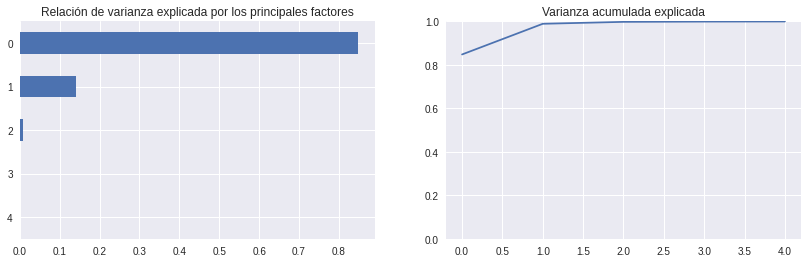

In [31]:
NumEigenvalues=5
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(title='Relación de varianza explicada por los principales factores',ax=axes[0]);
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(ylim=(0,1),ax=axes[1], title='Varianza acumulada explicada');

# varianza_explicada
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Varianza explicada_Top 5').head(NumEigenvalues).style.format('{:,.2%}'.format)

En efecto, el primer componente principal explica el 84.78% de la varianza, mientras que el segundo componente principal obtiene el 98.88% y el tercero el 99.77%. Los 3 primeros componentes principales explican, de forma acumulada, el 99.5% de todos los movimientos de los datos. Por lo tanto, en términos de reducción de la dimensionalidad, los 3 primeros componentes principales son representativos de los datos.

<a id='4.2.2'></a>
## 5.2.2. La intuición detrás de los componentes principales

Primero tenemos una función para determinar los pesos de cada componente principal. A continuación, realizamos la visualización de los componentes principales.

In [32]:
def PCWeights():
    '''
    Ponderación de los componentes principales (PC) para cada 28 PC
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

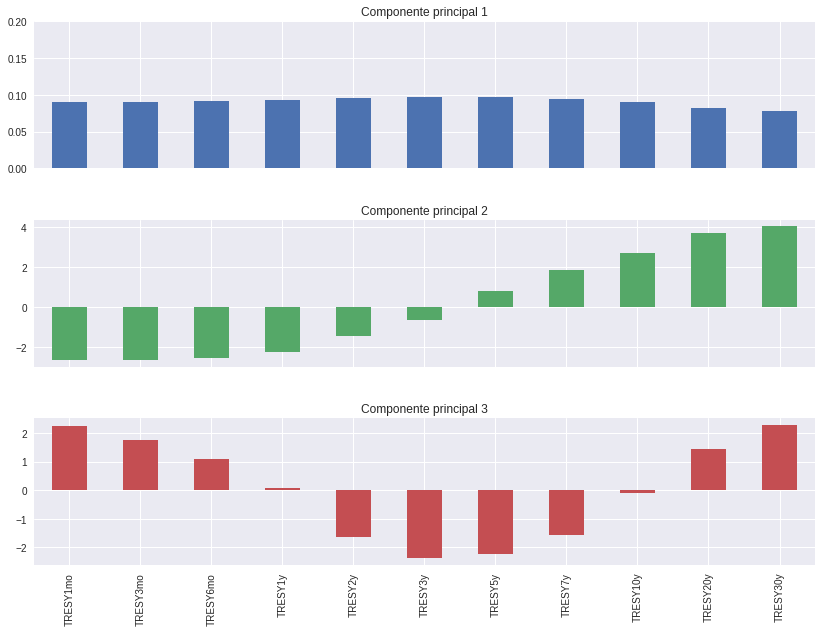

In [33]:
weights = PCWeights()
NumComponents=3    
        
topPortfolios = pd.DataFrame(weights[:NumComponents], columns=dataset.columns)
topPortfolios.index = [f'Componente principal {i}' for i in range(1, NumComponents+1)]

axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,10))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2);

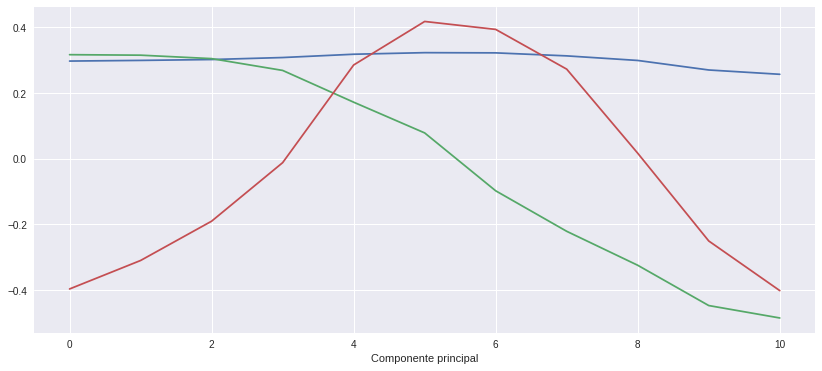

In [35]:
plt.figure(figsize=(14,6))
plt.plot(pca.components_[0:3].T)
plt.xlabel("Componente principal")
plt.show()

Si nos fijamos en la interpretación de los tres primeros componentes principales, estos corresponden a:

__Componente principal 1__: Movimientos direccionales en la curva de rendimiento. Son movimientos que desplazan toda la curva de rendimiento hacia arriba o hacia abajo.

__Componente principal 2__: Movimientos de pendiente en la curva de rendimiento. Se trata de movimientos que hacen más pronunciada o más plana (cambian la primera derivada respecto al vencimiento) toda la curva de rendimiento.

__Componente principal 3__: Movimientos de curvatura de la curva de rendimiento. Se trata de movimientos que modifican la curvatura (o la segunda derivada respecto al vencimiento) de toda la curva de rendimiento.

<a id='4.2.3'></a>
## 5.2.3. Reconstrucción de la curva mediante componentes principales

In [36]:
pca.transform(rescaledDataset)[:,:2]

array([[ 5.29192628, -0.36789759],
       [ 5.34971097, -0.39981889],
       [ 5.45245314, -0.45714746],
       ...,
       [-1.82775918,  0.84154118],
       [-2.06826932,  0.97517062],
       [-2.29510263,  1.03206869]])

Mediante la reconstrucción matricial simple, podemos generar una aproximación/réplica casi exacta de los datos iniciales.

Mecánicamente, el PCA no es más que una multiplicación de matrices:

$$Y=XW$$

donde $Y$ es su componente principal, $X$ son datos de entrada, y $W$ es una matriz de coeficientes.


El único truco aquí es que tu matriz de coeficientes es bastante especial: puedes usarla para recuperar la matriz original.

$$X=YW′$$

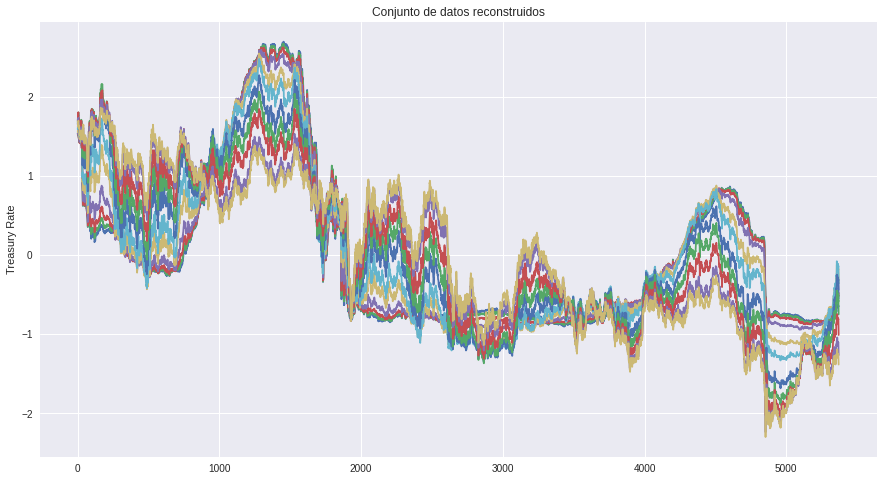

In [37]:
nComp=3
reconst= pd.DataFrame(np.dot(pca.transform(rescaledDataset)[:,:nComp], pca.components_[:nComp,:]),columns=dataset.columns)
plt.figure(figsize=(15,8))
plt.plot(reconst)
plt.ylabel("Treasury Rate")
plt.title("Conjunto de datos reconstruidos")
plt.show()

* La figura anterior muestra la réplica del gráfico de los tipos del tesoro.

__Conclusión__

Demostramos la eficacia de la reducción de la dimensionalidad y del análisis de componentes principales para reducir el número de dimensiones y obtener nuevas características intuitivas.


Los tres primeros tres componentes principales explican más del 99,5% de la variación y representan movimientos direccionales, movimientos de pendiente y movimientos de curvatura, respectivamente.
En general, mediante el análisis de componentes principales, el análisis de los vectores propios y la intuición que hay detrás de ellos, demostramos cómo la aplicación de una reducción de la dimensionalidad conduce a menos dimensiones intuitivas en la curva de rendimiento.
